# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display
init_printing()

# シンボル定義
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')

# Differential Geometry Module

公式ページの抄訳的に.

- [公式](http://docs.sympy.org/latest/modules/diffgeom.html)
- [memo 英語での解説](https://krastanov.wordpress.com/diff-geometry-in-python/)

## class sympy.diffgeom.Manifold

多様体のオブジェクト。

多様体のチャートのリストとして使う。
多様体の位相を研究するための手段は提供しない。

 ## class sympy.diffgeom.Patch

チャートのオブジェクト。

In [2]:
from sympy.diffgeom import Manifold, Patch
m = Manifold('M', 3)
p = Patch('P', m)
p in m.patches

True

##  class sympy.diffgeom.CoordSystem

座標変換ルールを含む。

多様体とチャートを定義し、チャート上に2つの座標系を定義する。

In [3]:
from sympy import symbols, sin, cos, pi
from sympy.diffgeom import Manifold, Patch, CoordSystem
from sympy.simplify import simplify
r, theta = symbols('r, theta')
m = Manifold('M', 2)
patch = Patch('P', m)
rect = CoordSystem('rect', patch)
polar = CoordSystem('polar', patch)
rect in patch.coord_systems

True

2 つの座標系をつなぐ。
できる場合は `solve` で逆変換を自動的に見つける。

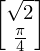

In [5]:
# 極座標に文字と関数を割り当てている
polar.connect_to(rect, [r, theta], [r*cos(theta), r*sin(theta)])

# 直交座標系に変換
display(polar.coord_tuple_transform_to(rect, [0, 2]))
display(polar.coord_tuple_transform_to(rect, [2, pi/2]))

# 直交座標を極座標に変換
display(rect.coord_tuple_transform_to(polar, [1, 1]).applyfunc(simplify))

ある座標系の座標で点を定義する。

具体的には極座標系で点を指定して、直交座標系での値を計算している。

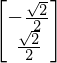

In [6]:
p = polar.point([1, 3*pi/4])
rect.point_to_coords(p)

座標関数を定義する：点を取り、座標を返す。

`BaseScalarField` のインスタンスになっている。

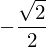

In [9]:
p = polar.point([1, 3*pi/4])
rect.coord_function(0)(p)

In [10]:
p = polar.point([1, 3*pi/4])
rect.coord_function(1)(p)

座標軸に沿った単位ベクトル場を定義する。
ベクトルはスカラー場に対する微分作用素で `BaseVectorField` のインスタンスになっている.

In [11]:
v_x = rect.base_vector(0)
x = rect.coord_function(0)
display(v_x(x))
display(v_x(v_x(x)))